In [27]:
import pandas as pd
import numpy as np
import re
import nltk
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [21]:
dataset = pd.read_csv('mann_ki_baat.csv',encoding='iso-8859-1')

In [47]:
modi_mask = np.array(Image.open('sh_narendra_modi_27.09.2016_1.png'))

In [22]:
dataset.head()

,Speech_text,month,year
0,"My Dear Countrymen,\r\nNamaskar!\r\nI was not ...",apr,2015
1,"My dear fellow citizens, Namaskar!\r\nIts sum...",apr,2016
2,My dearest countrymen namaskar. Before each ep...,apr,2017
3,"My dear countrymen, greetings to all of you! I...",aug,2015
4,"My dear countrymen, Namaskar,\r\nTomorrow, 29t...",aug,2016


In [23]:
dataset.shape

(36, 3)

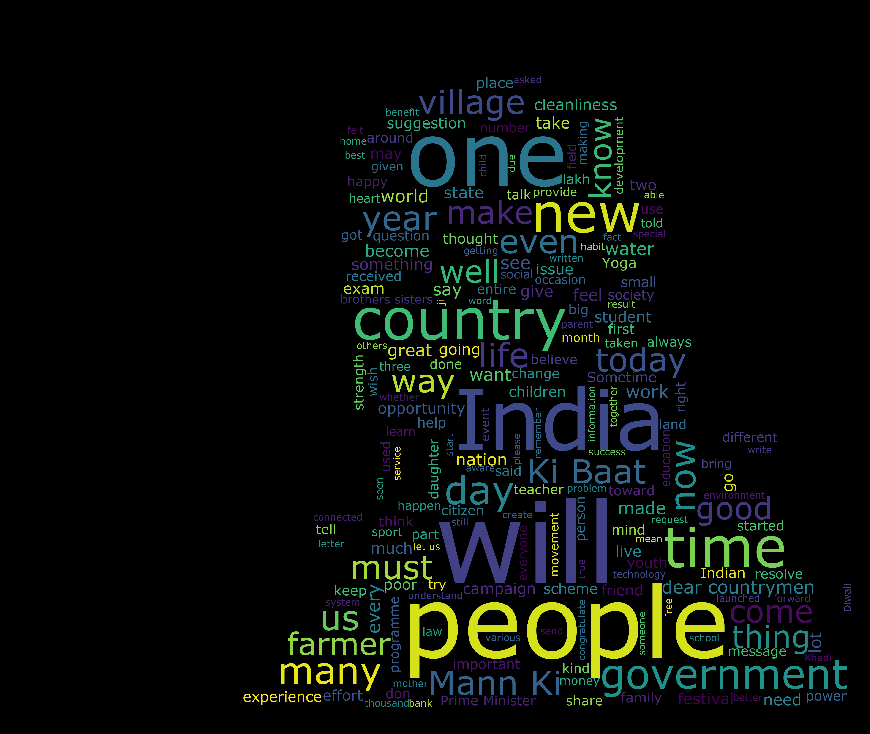

In [50]:
text = ''
for index, row in dataset.iterrows():
    text += row['Speech_text']

def generate_wordcloud(text):
    wordcloud = WordCloud(width=1600,height=800,font_path='/Library/Fonts/Verdana.ttf',
                          stopwords = STOPWORDS,
                          mask=modi_mask
                          ).generate(text)
    plt.figure(figsize=(20,10),facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig('wordcloud_whole_speech.png')
    plt.show()

generate_wordcloud(text)

In [31]:
from textblob import TextBlob
for index, row in dataset.iterrows():
    analysis = TextBlob(row['Speech_text'])
    if analysis.sentiment.polarity > 0: 
        print ('positive')
    elif analysis.sentiment.polarity == 0: 
        print ('neutral')
    else: 
        print ('negative')

positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive


In [60]:
pos_feq = {}
for index,row in dataset.iterrows():
    blob = TextBlob(row['Speech_text'])
    for i in range(0,len(blob.tags)):
        pos_feq[blob.tags[i][1]] = pos_feq.get(blob.tags[i][1],0) + 1

In [54]:
print(pos_feq)

{'PRP$': 3381.0, 'JJ': 8925.0, 'NNP': 8578.0, 'PRP': 8475.0, 'VBD': 2868.0, 'RB': 6306.0, 'VBG': 2407.0, 'IN': 16295.0, 'NN': 18834.0, 'VBP': 4665.0, 'CC': 4925.0, 'EX': 483.0, 'NNS': 9001.0, 'TO': 4120.0, 'VB': 6698.0, 'WRB': 850.0, 'DT': 14585.0, 'VBZ': 3698.0, 'VBN': 3739.0, 'CD': 1739.0, 'MD': 2792.0, 'WP': 655.0, 'WDT': 589.0, 'NNPS': 123.0, 'JJS': 237.0, 'PDT': 248.0, 'RP': 313.0, 'JJR': 318.0, 'RBR': 109.0, 'RBS': 44.0, 'WP$': 11.0, 'FW': 14.0, 'UH': 16.0}


In [65]:
stopwords = nltk.corpus.stopwords.words('english')

In [86]:
ps = nltk.PorterStemmer()
summaries = []
for index,row in dataset.iterrows():
    print("Index: ",index)
    text = row['Speech_text']
    words = nltk.word_tokenize(text)
    for i in range(0,len(words)):
        words[i] = ps.stem(words[i]) 
    freq = {}
    for word in words:
        word = word.lower()
        if word not in stopwords:
            freq[word] = freq.get(word,0) + 1
        sentences = nltk.sent_tokenize(text)
        sentf = {}
        for sentence in sentences:
            for word in freq:
                if word in sentence.lower():
                    sentf[sentence[:12]] = sentf.get(sentence[:12],0) + freq[word]
        sumValues = 0
    for sentence in sentf:
        sumValues += sentf[sentence]
    average = int(sumValues/ len(sentf))
    summary = ''
    for sentence in sentences:
        if sentence[:12] in sentf and sentf[sentence[:12]] > (1.5 * average):
            summary +=  " " + sentence
    summaries.append(summary)

Index:  0
Index:  1
Index:  2
Index:  3
Index:  4
Index:  5
Index:  6
Index:  7
Index:  8
Index:  9
Index:  10
Index:  11
Index:  12
Index:  13
Index:  14
Index:  15
Index:  16
Index:  17
Index:  18
Index:  19
Index:  20
Index:  21
Index:  22
Index:  23
Index:  24
Index:  25
Index:  26
Index:  27
Index:  28
Index:  29
Index:  30
Index:  31
Index:  32
Index:  33
Index:  34
Index:  35


In [87]:
print(summaries)

[' There has been loss of property because of the earthquake. Not only this, when we safely rescued a new born girl who was just a week old, we felt how much power humanity has. Wherever I went overseas in the last few days, I received compliments for one thing and that was for saving citizens of 48 countries of the world in Yemen. And due to this, the world has experienced the old saying of India, â\x80\x9cà¤¸à¥\x87à¤µà¤¾ à¤ªà¤°à¤®à¥\x8b à¤§à¤°à¥\x8dà¤®à¤\x83â\x80\x9d, meaning the greatest service to humanity is to serve others. This is the centenary year of the sacrifices made by the Indian heroes and â\x80\x9cà¤¸à¥\x87à¤µà¤¾ à¤ªà¤°à¤®à¥\x8b à¤§à¤°à¥\x8dà¤®à¤\x83â\x80\x9d, meaning the greatest service to humanity is to serve others and how this phrase has been lived by our country; this year is a centenary year for this reason also. And this is also a matter of pride that about 9200 soldiers, who lost their life, were bestowed with Gallantry Award. Not only this, there were eleven su

In [93]:
for index,row in dataset.iterrows():
    print(len(row['Speech_text'])," ",len(summaries[index]))

9190   1434
27121   4686
23421   2773
15293   1830
24815   3446
22904   3261
18533   2335
18176   2514
23432   3953
17527   2811
28842   3741
22760   1722
22289   3774
18019   1159
23432   3953
14492   1999
27401   4328
22312   4890
16654   1058
23263   4897
19819   1572
25998   5896
22824   4102
22902   2305
19137   1718
26950   4220
20859   2936
12447   1701
19709   2104
28815   3084
12447   1701
24762   3444
26443   2687
22163   5100
24398   2327
21122   4011
